# Error comparison

In [2]:
from numpy import *
from matplotlib import pyplot as plt

## Error function

In [39]:
def comparison_error(LSTM,PCESN,true):
    # true (nSamples x nJoints)
    # pred (nSamples x nJoints)
    #return error_joints, error_avg
    
    nSamples = size(true,axis=0)
    sigma = var(true,axis=0) # Normalizing with variance
    
    err_L = zeros((nSamples-1,1))
    err_P = zeros((nSamples-1,1))
    for i in range(nSamples-1):
        eL = abs(true[0:i,:]-LSTM[0:i,:])**2
        sL = sum(eL,axis=0)
        if i == 0:
            L_joints = sL/(1*sigma) # Mean error of each joint
        else:
            L_joints = sL/(i*sigma) # Mean error of each joint

        err_L[i] = mean(L_joints,axis=0) # Combined joint error
        
        eP = abs(true[0:i,:]-PCESN[0:i,:])**2
        sP = sum(eP,axis=0)
        if i == 0:
            P_joints = sP/(1*sigma) # Mean error of each joint
        else:
            P_joints = sP/(i*sigma) # Mean error of each joint
            
        err_P[i]=mean(P_joints,axis=0) # Combined joint error

    return err_L, err_P

def comparison_error2(LSTM,PCESN,true): # Only considering 100 samples at the time
    # true (nSamples x nJoints)
    # pred (nSamples x nJoints)
    #return error_joints, error_avg
    
    nSamples = size(true,axis=0)
    sigma = var(true,axis=0) # Normalizing with variance
    
    err_L = []
    err_P = []
    for i in range(100,nSamples,100):
        eL = abs(true[0:i,:]-LSTM[0:i,:])**2
        sL = sum(eL,axis=0)
        L_joints = sL/(i*sigma) # Mean error of each joint
        err_L.append(mean(L_joints,axis=0)) # Combined joint error
        
        eP = abs(true[0:i,:]-PCESN[0:i,:])**2
        sP = sum(eP,axis=0)
        P_joints = sP/(i*sigma) # Mean error of each joint    
        err_P.append(mean(P_joints,axis=0)) # Combined joint error

    return asarray(err_L), asarray(err_P)

## Load data and calculate error

In [80]:
nInputs = 21
nOutputs = 7

data = genfromtxt('SimulinkData_PickUp.csv', delimiter=',')
true = data[:,nInputs:,newaxis]

LSTMres = load('LSTM_prediction.npy')
PCESNres = load('PCESN_prediction.npy')

# Make sure data is on the form (nSamples x joints)!
err_L, err_P = comparison_error2(LSTMres[:,0,:],PCESNres[:,:,0].T,true[:,:,0])

## Plot

Text(0.5,1,'Error comparison')

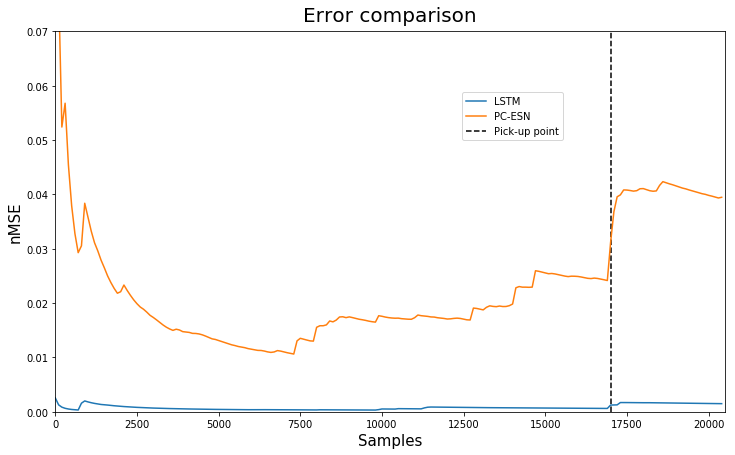

In [79]:
title_font = {'size':'20','verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'size':'15'}

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)
plt.plot(err_L,label='LSTM')
plt.plot(err_P,label='PC-ESN')
plt.ylim(0.0, 0.07)
plt.xlim(0,205)
ax.set_xticklabels(range(0,202500,2500))
plt.vlines(int(17001/100), 0.0, 0.1, colors='k', linestyles='dashed',label='Pick-up point')
plt.legend(bbox_to_anchor=(0.6, 0.7),loc='lower left',ncol=1)
plt.xlabel('Samples',**axis_font)
plt.ylabel('nMSE',**axis_font)
plt.title('Error comparison',**title_font)
#fig.savefig('Basic.png', dpi=300)